In [11]:
from sklearn.tree import DecisionTreeClassifier, export_text
import pandas as pd

# Create a sample dataset
data = {
    'amount': [0.2, 0.6, 0.3, 0.4, 0.8, 0.5],
    'score': [0.7, 0.9, 0.5, 0.6, 0.3, 0.4],
    'address_change60day': [0.0, 1.0, 0.0, 1.0, 0.0, 1.0],
    'transaction_count': [10, 5, 8, 6, 2, 4],
    'amount60days': [0.5, 0.7, 0.3, 0.8, 0.2, 0.6],
    'fraud': [0, 1, 0, 1, 1, 0]
}

df = pd.DataFrame(data)

# Separate the features and the target variable
X = df.drop('fraud', axis=1)
y = df['fraud']

# Create a decision tree classifier
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X, y)

# Extract the rules from the decision tree
rules = export_text(clf, feature_names=list(X.columns))

print(rules)


|--- transaction_count <= 7.00
|   |--- score <= 0.50
|   |   |--- address_change60day <= 0.50
|   |   |   |--- class: 1
|   |   |--- address_change60day >  0.50
|   |   |   |--- class: 0
|   |--- score >  0.50
|   |   |--- class: 1
|--- transaction_count >  7.00
|   |--- class: 0



In [13]:
from sklearn.tree import DecisionTreeClassifier, export_text
import pandas as pd

# Create a sample dataset
data = {
    'amount': [0.2, 0.6, 0.3, 0.4, 0.8, 0.5],
    'score': [700, 900, 500, 600, 300, 400],
    'address_change60day': [0.0, 1.0, 0.0, 1.0, 0.0, 1.0],
    'transaction_count': [10, 5, 8, 6, 2, 4],
    'amount60days': [0.5, 0.7, 0.3, 0.8, 0.2, 0.6],
    'fraud': [0, 1, 0, 1, 1, 0]
}

df = pd.DataFrame(data)

# Filter the dataset to include samples where score > 500
df_filtered = df[df['score'] > 500]

# Separate the features and the target variable
X = df_filtered.drop('fraud', axis=1)
y = df_filtered['fraud']

# Create a decision tree classifier
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X, y)

# Extract the rules from the decision tree
tree_rules = export_text(clf, feature_names=list(X.columns), show_weights=False)

# Function to filter the rules with ">" conditions only
def filter_rules(rule_text):
    filtered_rules = []
    rules = rule_text.split('\n')
    for rule in rules:
        if ">" in rule:
            filtered_rules.append(rule)
    return "\n".join(filtered_rules)

# Filter the rules with ">" conditions only
filtered_rules = filter_rules(tree_rules)

print(filtered_rules)


|--- transaction_count >  8.00


Matplotlib is building the font cache; this may take a moment.


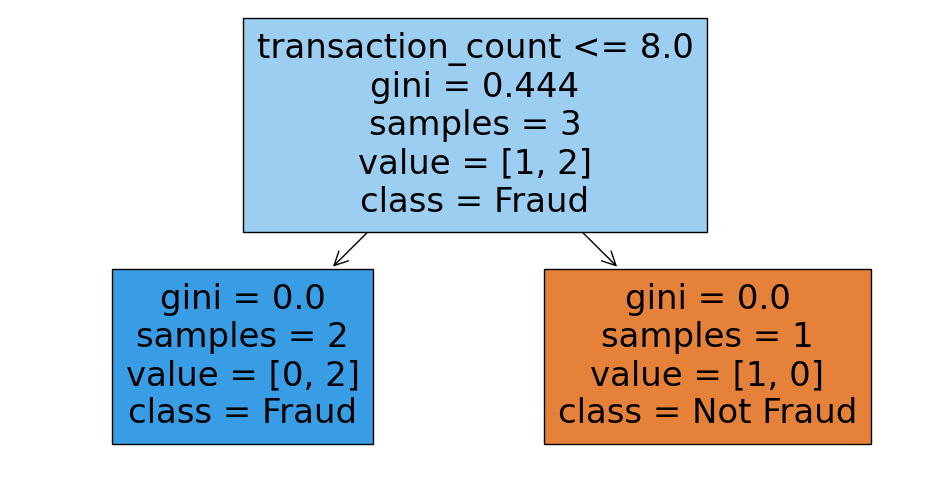

transaction_count > 8.0 AND Class: Fraud (Fraud Count: 2.0)


In [16]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
import pandas as pd
import matplotlib.pyplot as plt

# Create a sample dataset
data = {
    'amount': [0.2, 0.6, 0.3, 0.4, 0.8, 0.5],
    'score': [700, 900, 500, 600, 300, 400],
    'address_change60day': [0.0, 1.0, 0.0, 1.0, 0.0, 1.0],
    'transaction_count': [10, 5, 8, 6, 2, 4],
    'amount60days': [0.5, 0.7, 0.3, 0.8, 0.2, 0.6],
    'fraud': [0, 1, 0, 1, 1, 0]
}

df = pd.DataFrame(data)

# Filter the dataset to include samples where score > 500
df_filtered = df[df['score'] > 500]

# Separate the features and the target variable
X = df_filtered.drop('fraud', axis=1)
y = df_filtered['fraud']

# Create a decision tree classifier
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X, y)

# Visualize the decision tree
plt.figure(figsize=(12, 6))
plot_tree(clf, feature_names=list(X.columns), class_names=['Not Fraud', 'Fraud'], filled=True)
plt.show()

# Function to extract rules from the decision tree
def extract_rules(tree, feature_names, threshold):
    rules = []

    def recurse(node, rule):
        nonlocal rules
        if tree.feature[node] != -2:  # Internal node
            feature = feature_names[tree.feature[node]]
            threshold_value = tree.threshold[node]
            condition = f"{feature} > {threshold_value}"
            rule.append(condition)

            left_child = tree.children_left[node]
            right_child = tree.children_right[node]

            recurse(left_child, rule.copy())
            rule[-1] = f"not({condition})"
            recurse(right_child, rule.copy())
        else:  # Leaf node
            class_index = tree.value[node].argmax()
            fraud_count = tree.value[node][0][1]
            if fraud_count > threshold:
                rule.append(f"Class: Fraud (Fraud Count: {fraud_count})")
                rules.append(rule)

    root_node = 0
    initial_rule = []
    recurse(root_node, initial_rule)

    return rules

# Set the threshold for fraud count
threshold = 0

# Extract the rules from the decision tree
rules = extract_rules(clf.tree_, list(X.columns), threshold)

# Print the extracted rules
if not rules:
    print("No significant rules found.")
else:
    for rule in rules:
        print(" AND ".join(rule))


In [20]:
import random
import pandas as pd

# Set the random seed for reproducibility
random.seed(42)

# Define the number of samples
num_samples = 50000

# Define the fraud rate
fraud_rate = 0.02

# Calculate the number of fraud samples based on the fraud rate
num_fraud = int(num_samples * fraud_rate)

# Calculate the number of non-fraud samples
num_non_fraud = num_samples - num_fraud

# Generate the fraud samples
fraud_data = {
    'amount': [random.randint(1, 1000) for _ in range(num_fraud)],
    'score': [random.randint(0, 999) for _ in range(num_fraud)],
    'address_change60day': [random.randint(0, 10) for _ in range(num_fraud)],
    'transaction_count': [random.randint(0, 100) for _ in range(num_fraud)],
    'amount60days': [random.randint(10, 1000) for _ in range(num_fraud)],
    'fraud': [1 for _ in range(num_fraud)]
}

# Generate the non-fraud samples
non_fraud_data = {
    'amount': [random.randint(1, 1000) for _ in range(num_non_fraud)],
    'score': [random.randint(0, 999) for _ in range(num_non_fraud)],
    'address_change60day': [random.randint(0, 10) for _ in range(num_non_fraud)],
    'transaction_count': [random.randint(0, 100) for _ in range(num_non_fraud)],
    'amount60days': [random.randint(10, 1000) for _ in range(num_non_fraud)],
    'fraud': [0 for _ in range(num_non_fraud)]
}

# Concatenate the fraud and non-fraud samples
df = pd.DataFrame(fraud_data)
df = pd.concat([df, pd.DataFrame(non_fraud_data)], ignore_index=True)

# Shuffle the dataset
df = df.sample(frac=1, random_state=42).reset_index(drop=True)

# Print the first few rows of the generated dataset
print(df.head())


   amount  score  address_change60day  transaction_count  amount60days  fraud
0     147    565                    1                  6           857      0
1     850    502                   10                 80           239      0
2     699    595                    1                 86           114      1
3     264    358                    2                 18           442      0
4     954    753                    4                  1           777      0


In [21]:
df['fraud'].value_counts()

0    49000
1     1000
Name: fraud, dtype: int64

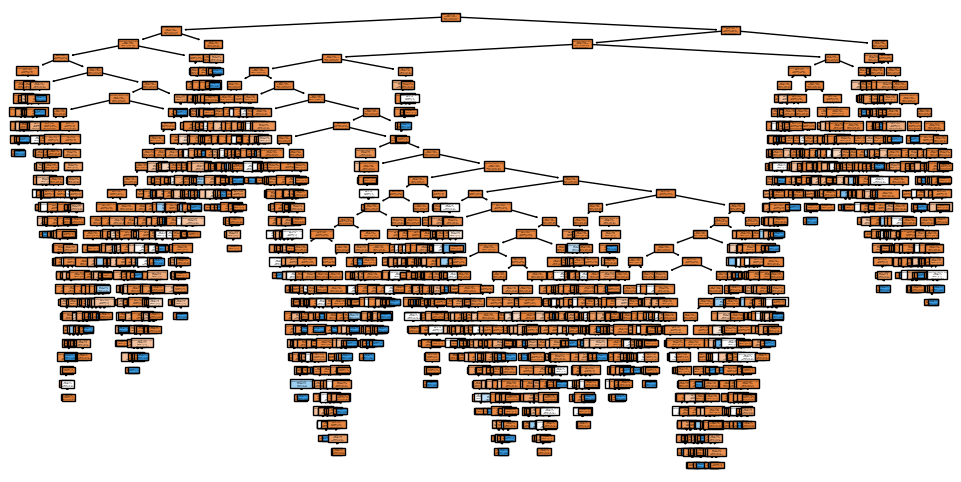

amount60days > 180.5 AND transaction_count > 89.5 AND transaction_count > 85.5 AND score > 548.5 AND address_change60day > 9.5 AND transaction_count > 18.5 AND transaction_count > 17.5 AND address_change60day > 1.5 AND amount60days > 102.5 AND not(amount60days > 77.5) AND Class: Fraud (Fraud Count: 1.0)
amount60days > 180.5 AND transaction_count > 89.5 AND transaction_count > 85.5 AND score > 548.5 AND address_change60day > 9.5 AND transaction_count > 18.5 AND not(transaction_count > 17.5) AND amount60days > 118.5 AND not(amount60days > 95.5) AND Class: Fraud (Fraud Count: 1.0)
amount60days > 180.5 AND transaction_count > 89.5 AND transaction_count > 85.5 AND score > 548.5 AND not(address_change60day > 9.5) AND score > 504.5 AND amount > 571.0 AND Class: Fraud (Fraud Count: 1.0)
amount60days > 180.5 AND transaction_count > 89.5 AND transaction_count > 85.5 AND score > 548.5 AND not(address_change60day > 9.5) AND not(score > 504.5) AND not(amount > 691.0) AND amount > 717.0 AND Class: F

<Figure size 640x480 with 0 Axes>

In [23]:
# Filter the dataset to include samples where score > 500
df_filtered = df[df['score'] > 500]

# Separate the features and the target variable
X = df_filtered.drop('fraud', axis=1)
y = df_filtered['fraud']

# Create a decision tree classifier
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X, y)

# Visualize the decision tree
plt.figure(figsize=(12, 6))
plot_tree(clf, feature_names=list(X.columns), class_names=['Not Fraud', 'Fraud'], filled=True)
plt.show()

plt.savefig('decision_tree_plot.png', dpi=300)

# Function to extract rules from the decision tree
def extract_rules(tree, feature_names, threshold):
    rules = []

    def recurse(node, rule):
        nonlocal rules
        if tree.feature[node] != -2:  # Internal node
            feature = feature_names[tree.feature[node]]
            threshold_value = tree.threshold[node]
            condition = f"{feature} > {threshold_value}"
            rule.append(condition)

            left_child = tree.children_left[node]
            right_child = tree.children_right[node]

            recurse(left_child, rule.copy())
            rule[-1] = f"not({condition})"
            recurse(right_child, rule.copy())
        else:  # Leaf node
            class_index = tree.value[node].argmax()
            fraud_count = tree.value[node][0][1]
            if fraud_count > threshold:
                rule.append(f"Class: Fraud (Fraud Count: {fraud_count})")
                rules.append(rule)

    root_node = 0
    initial_rule = []
    recurse(root_node, initial_rule)

    return rules

# Set the threshold for fraud count
threshold = 0

# Extract the rules from the decision tree
rules = extract_rules(clf.tree_, list(X.columns), threshold)

# Print the extracted rules
if not rules:
    print("No significant rules found.")
else:
    for rule in rules:
        print(" AND ".join(rule))

In [24]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

# Filter the dataset to include samples where score > 500
df_filtered = df[df['score'] > 500]

# Separate the features and the target variable
X = df_filtered.drop('fraud', axis=1)
y = df_filtered['fraud']

# Create a decision tree classifier
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X, y)

# Visualize the decision tree
#plt.figure(figsize=(12, 6))
#plot_tree(clf, feature_names=list(X.columns), class_names=['Not Fraud', 'Fraud'], filled=True)
#plt.show()

#plt.savefig('decision_tree_plot.png', dpi=300)

# Function to extract rules from the decision tree
def extract_rules(tree, feature_names, threshold):
    max_fraud_count = 0
    max_fraud_rule = []

    def recurse(node, rule, fraud_count):
        nonlocal max_fraud_count, max_fraud_rule

        if tree.feature[node] != -2:  # Internal node
            feature = feature_names[tree.feature[node]]
            threshold_value = tree.threshold[node]
            condition = f"{feature} > {threshold_value}"
            rule.append(condition)

            left_child = tree.children_left[node]
            right_child = tree.children_right[node]

            recurse(left_child, rule.copy(), fraud_count)
            rule[-1] = f"not({condition})"
            recurse(right_child, rule.copy(), fraud_count)
        else:  # Leaf node
            class_index = tree.value[node].argmax()
            fraud_count += tree.value[node][0][1]

            if fraud_count > max_fraud_count:
                max_fraud_count = fraud_count
                max_fraud_rule = rule.copy()

    root_node = 0
    initial_rule = []
    recurse(root_node, initial_rule, 0)

    return max_fraud_rule

# Extract the rules capturing maximum frauds from the decision tree
max_fraud_rule = extract_rules(clf.tree_, list(X.columns), threshold)

# Print the rule capturing maximum frauds
if not max_fraud_rule:
    print("No significant rules found.")
else:
    print(" AND ".join(max_fraud_rule))


not(amount60days > 180.5) AND amount60days > 891.5 AND transaction_count > 87.5 AND amount60days > 887.5 AND not(amount60days > 246.5) AND not(amount60days > 249.5) AND not(score > 503.5) AND amount > 999.5 AND not(score > 542.5) AND not(amount > 1.5) AND not(amount > 19.5) AND not(transaction_count > 29.5) AND amount > 340.5 AND not(score > 543.5) AND transaction_count > 31.5 AND not(amount60days > 817.0) AND score > 772.5 AND address_change60day > 8.5


In [25]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

# Filter the dataset to include samples where score > 500
df_filtered = df[df['score'] > 500]

# Separate the features and the target variable
X = df_filtered.drop('fraud', axis=1)
y = df_filtered['fraud']

# Create a decision tree classifier
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X, y)

# Visualize the decision tree
#plt.figure(figsize=(12, 6))
#plot_tree(clf, feature_names=list(X.columns), class_names=['Not Fraud', 'Fraud'], filled=True)
#plt.show()

plt.savefig('decision_tree_plot.png', dpi=300)

# Function to extract rules from the decision tree
def extract_rules(tree, feature_names, threshold):
    max_fraud_count = 0
    max_fraud_rule = []

    def recurse(node, rule, fraud_count):
        nonlocal max_fraud_count, max_fraud_rule

        if tree.feature[node] != -2:  # Internal node
            feature = feature_names[tree.feature[node]]
            threshold_value = tree.threshold[node]
            condition = f"{feature} > {threshold_value}"
            rule.append(condition)

            left_child = tree.children_left[node]
            right_child = tree.children_right[node]

            recurse(left_child, rule.copy(), fraud_count)
            rule[-1] = f"not({condition})"
            recurse(right_child, rule.copy(), fraud_count)
        else:  # Leaf node
            class_index = tree.value[node].argmax()
            fraud_count += tree.value[node][0][1]

            if fraud_count > max_fraud_count and all('>' in condition for condition in rule):
                max_fraud_count = fraud_count
                max_fraud_rule = rule.copy()

    root_node = 0
    initial_rule = []
    recurse(root_node, initial_rule, 0)

    return max_fraud_rule

# Extract the rules capturing maximum frauds using ">" operator only
max_fraud_rule = extract_rules(clf.tree_, list(X.columns), threshold)

# Print the rule capturing maximum frauds
if not max_fraud_rule:
    print("No significant rules found.")
else:
    print(" AND ".join(max_fraud_rule))


not(amount60days > 180.5) AND amount60days > 891.5 AND transaction_count > 87.5 AND amount60days > 887.5 AND not(amount60days > 246.5) AND not(amount60days > 249.5) AND not(score > 503.5) AND amount > 999.5 AND not(score > 542.5) AND not(amount > 1.5) AND not(amount > 19.5) AND not(transaction_count > 29.5) AND amount > 340.5 AND not(score > 543.5) AND transaction_count > 31.5 AND not(amount60days > 817.0) AND score > 772.5 AND address_change60day > 8.5


<Figure size 640x480 with 0 Axes>

In [27]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

# Filter the dataset to include samples where score > 500
df_filtered = df[df['score'] > 500]

# Separate the features and the target variable
X = df_filtered.drop('fraud', axis=1)
y = df_filtered['fraud']

# Create a decision tree classifier
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X, y)

# Visualize the decision tree
#plt.figure(figsize=(12, 6))
#plot_tree(clf, feature_names=list(X.columns), class_names=['Not Fraud', 'Fraud'], filled=True)
#plt.show()

plt.savefig('decision_tree_plot.png', dpi=300)

# Function to extract rules from the decision tree
def extract_rules(tree, feature_names, threshold):
    rules = []
    
    def recurse(node, rule, fraud_count):
        nonlocal rules

        if tree.feature[node] != -2:  # Internal node
            feature = feature_names[tree.feature[node]]
            threshold_value = tree.threshold[node]
            condition = f"{feature} > {threshold_value}"
            rule.append(condition)

            left_child = tree.children_left[node]
            right_child = tree.children_right[node]

            recurse(left_child, rule.copy(), fraud_count)
            rule[-1] = f"not({condition})"
            recurse(right_child, rule.copy(), fraud_count)
        else:  # Leaf node
            class_index = tree.value[node].argmax()
            fraud_count += tree.value[node][0][1]

            if fraud_count > threshold:
                rule_with_count = (rule.copy(), fraud_count)
                rules.append(rule_with_count)

    root_node = 0
    initial_rule = []
    initial_fraud_count = 0
    recurse(root_node, initial_rule, initial_fraud_count)

    return rules

# Set the threshold for fraud count
threshold = 0

# Extract the rules capturing maximum frauds using ">" operator only
rules = extract_rules(clf.tree_, list(X.columns), threshold)

# Print the rules capturing maximum frauds along with the fraud counts
if not rules:
    print("No significant rules found.")
else:
    for rule, fraud_count in rules:
        rule_string = " AND ".join(rule)
        print(f"Rule: {rule_string}\nFraud Count: {fraud_count}\n")


Rule: amount60days > 180.5 AND transaction_count > 89.5 AND transaction_count > 85.5 AND score > 548.5 AND address_change60day > 9.5 AND transaction_count > 18.5 AND transaction_count > 17.5 AND address_change60day > 1.5 AND amount60days > 102.5 AND not(amount60days > 77.5)
Fraud Count: 1.0

Rule: amount60days > 180.5 AND transaction_count > 89.5 AND transaction_count > 85.5 AND score > 548.5 AND address_change60day > 9.5 AND transaction_count > 18.5 AND not(transaction_count > 17.5) AND amount60days > 118.5 AND not(amount60days > 95.5)
Fraud Count: 1.0

Rule: amount60days > 180.5 AND transaction_count > 89.5 AND transaction_count > 85.5 AND score > 548.5 AND not(address_change60day > 9.5) AND score > 504.5 AND amount > 571.0
Fraud Count: 1.0

Rule: amount60days > 180.5 AND transaction_count > 89.5 AND transaction_count > 85.5 AND score > 548.5 AND not(address_change60day > 9.5) AND not(score > 504.5) AND not(amount > 691.0) AND amount > 717.0
Fraud Count: 1.0

Rule: amount60days > 180

<Figure size 640x480 with 0 Axes>

In [29]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

# Filter the dataset to include samples where score > 500
df_filtered = df[df['score'] > 500]

# Separate the features and the target variable
X = df_filtered.drop('fraud', axis=1)
y = df_filtered['fraud']

# Create a decision tree classifier
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X, y)

# Visualize the decision tree
#plt.figure(figsize=(12, 6))
#plot_tree(clf, feature_names=list(X.columns), class_names=['Not Fraud', 'Fraud'], filled=True)
#plt.show()

plt.savefig('decision_tree_plot.png', dpi=300)

# Function to extract rules from the decision tree
def extract_rules(tree, feature_names, threshold):
    rules = []
    
    def recurse(node, rule, fraud_count):
        nonlocal rules

        if tree.feature[node] != -2:  # Internal node
            feature = feature_names[tree.feature[node]]
            threshold_value = tree.threshold[node]
            condition = f"{feature} > {threshold_value}"
            rule.append(condition)

            left_child = tree.children_left[node]
            right_child = tree.children_right[node]

            recurse(left_child, rule.copy(), fraud_count)
            rule[-1] = f"not({condition})"
            recurse(right_child, rule.copy(), fraud_count)
        else:  # Leaf node
            class_index = tree.value[node].argmax()
            fraud_count += tree.value[node][0][class_index]

            if fraud_count > threshold:
                rule_with_count = (rule.copy(), fraud_count)
                rules.append(rule_with_count)

    root_node = 0
    initial_rule = []
    initial_fraud_count = 0
    recurse(root_node, initial_rule, initial_fraud_count)

    return rules

# Set the threshold for fraud count
threshold = 0

# Extract the rules capturing maximum frauds using ">" operator only
rules = extract_rules(clf.tree_, list(X.columns), threshold)

# Print the rules capturing maximum frauds along with the fraud counts
if not rules:
    print("No significant rules found.")
else:
    for rule, fraud_count in rules:
        rule_string = " AND ".join(rule)
        print(f"Rule: {rule_string}\nFraud Count: {fraud_count}\n")


Rule: amount60days > 180.5 AND transaction_count > 89.5 AND transaction_count > 85.5 AND score > 548.5 AND address_change60day > 9.5 AND transaction_count > 18.5 AND transaction_count > 17.5 AND address_change60day > 1.5 AND amount60days > 102.5 AND amount60days > 77.5
Fraud Count: 6.0

Rule: amount60days > 180.5 AND transaction_count > 89.5 AND transaction_count > 85.5 AND score > 548.5 AND address_change60day > 9.5 AND transaction_count > 18.5 AND transaction_count > 17.5 AND address_change60day > 1.5 AND amount60days > 102.5 AND not(amount60days > 77.5)
Fraud Count: 1.0

Rule: amount60days > 180.5 AND transaction_count > 89.5 AND transaction_count > 85.5 AND score > 548.5 AND address_change60day > 9.5 AND transaction_count > 18.5 AND transaction_count > 17.5 AND address_change60day > 1.5 AND not(amount60days > 102.5)
Fraud Count: 11.0

Rule: amount60days > 180.5 AND transaction_count > 89.5 AND transaction_count > 85.5 AND score > 548.5 AND address_change60day > 9.5 AND transaction_

<Figure size 640x480 with 0 Axes>

In [30]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

# Filter the dataset to include samples where score > 500
df_filtered = df[df['score'] > 500]

# Separate the features and the target variable
X = df_filtered.drop('fraud', axis=1)
y = df_filtered['fraud']

# Create a decision tree classifier
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X, y)

# Visualize the decision tree
#plt.figure(figsize=(12, 6))
#plot_tree(clf, feature_names=list(X.columns), class_names=['Not Fraud', 'Fraud'], filled=True)
#plt.show()

plt.savefig('decision_tree_plot.png', dpi=300)

# Function to extract rules from the decision tree
def extract_rules(tree, feature_names, threshold):
    rules = []
    
    def recurse(node, rule):
        nonlocal rules

        if tree.feature[node] != -2:  # Internal node
            feature = feature_names[tree.feature[node]]
            threshold_value = tree.threshold[node]
            condition = f"{feature} > {threshold_value}"
            rule.append(condition)

            left_child = tree.children_left[node]
            right_child = tree.children_right[node]

            recurse(left_child, rule.copy())
            rule[-1] = f"not({condition})"
            recurse(right_child, rule.copy())
        else:  # Leaf node
            class_index = tree.value[node].argmax()
            fraud_count = tree.value[node][0][1]
            rule_with_count = (rule.copy(), fraud_count)
            rules.append(rule_with_count)

    root_node = 0
    initial_rule = []
    recurse(root_node, initial_rule)

    return rules

# Set the threshold for fraud count
threshold = 0

# Extract the rules capturing maximum frauds using ">" operator only
rules = extract_rules(clf.tree_, list(X.columns), threshold)

# Print the rules capturing maximum frauds along with the fraud counts
if not rules:
    print("No significant rules found.")
else:
    for rule, fraud_count in rules:
        rule_string = " AND ".join(rule)
        print(f"Rule: {rule_string}\nFraud Count: {fraud_count}\n")


Rule: amount60days > 180.5 AND transaction_count > 89.5 AND transaction_count > 85.5 AND score > 548.5 AND address_change60day > 9.5 AND transaction_count > 18.5 AND transaction_count > 17.5 AND address_change60day > 1.5 AND amount60days > 102.5 AND amount60days > 77.5
Fraud Count: 0.0

Rule: amount60days > 180.5 AND transaction_count > 89.5 AND transaction_count > 85.5 AND score > 548.5 AND address_change60day > 9.5 AND transaction_count > 18.5 AND transaction_count > 17.5 AND address_change60day > 1.5 AND amount60days > 102.5 AND not(amount60days > 77.5)
Fraud Count: 1.0

Rule: amount60days > 180.5 AND transaction_count > 89.5 AND transaction_count > 85.5 AND score > 548.5 AND address_change60day > 9.5 AND transaction_count > 18.5 AND transaction_count > 17.5 AND address_change60day > 1.5 AND not(amount60days > 102.5)
Fraud Count: 0.0

Rule: amount60days > 180.5 AND transaction_count > 89.5 AND transaction_count > 85.5 AND score > 548.5 AND address_change60day > 9.5 AND transaction_c

<Figure size 640x480 with 0 Axes>

In [31]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

# Filter the dataset to include samples where score > 500
df_filtered = df[df['score'] > 500]

# Separate the features and the target variable
X = df_filtered.drop('fraud', axis=1)
y = df_filtered['fraud']

# Create a decision tree classifier
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X, y)

# Visualize the decision tree
#plt.figure(figsize=(12, 6))
#plot_tree(clf, feature_names=list(X.columns), class_names=['Not Fraud', 'Fraud'], filled=True)
#plt.show()

plt.savefig('decision_tree_plot.png', dpi=300)

# Function to extract rules from the decision tree
def extract_rules(tree, feature_names, threshold):
    rules = []
    
    def recurse(node, rule):
        nonlocal rules

        if tree.feature[node] != -2:  # Internal node
            feature = feature_names[tree.feature[node]]
            threshold_value = tree.threshold[node]
            condition = f"{feature} > {threshold_value}"
            rule.append(condition)

            left_child = tree.children_left[node]
            right_child = tree.children_right[node]

            recurse(left_child, rule.copy())
            rule[-1] = f"not({condition})"
            recurse(right_child, rule.copy())
        else:  # Leaf node
            class_index = tree.value[node].argmax()
            fraud_count = tree.value[node][0][1]
            rule_with_count = (rule.copy(), fraud_count)
            rules.append(rule_with_count)

    root_node = 0
    initial_rule = []
    recurse(root_node, initial_rule)

    return rules

# Set the threshold for fraud count
threshold = 0

# Extract the rules capturing maximum frauds using ">" operator only
rules = extract_rules(clf.tree_, list(X.columns), threshold)

# Print the rules capturing maximum frauds along with the fraud counts
if not rules:
    print("No significant rules found.")
else:
    for i, (rule, fraud_count) in enumerate(rules, 1):
        print(f"Rule {i}:")
        for condition in rule:
            print(condition)
        print(f"Fraud Count: {fraud_count}\n")


Rule 1:
amount60days > 180.5
transaction_count > 89.5
transaction_count > 85.5
score > 548.5
address_change60day > 9.5
transaction_count > 18.5
transaction_count > 17.5
address_change60day > 1.5
amount60days > 102.5
amount60days > 77.5
Fraud Count: 0.0

Rule 2:
amount60days > 180.5
transaction_count > 89.5
transaction_count > 85.5
score > 548.5
address_change60day > 9.5
transaction_count > 18.5
transaction_count > 17.5
address_change60day > 1.5
amount60days > 102.5
not(amount60days > 77.5)
Fraud Count: 1.0

Rule 3:
amount60days > 180.5
transaction_count > 89.5
transaction_count > 85.5
score > 548.5
address_change60day > 9.5
transaction_count > 18.5
transaction_count > 17.5
address_change60day > 1.5
not(amount60days > 102.5)
Fraud Count: 0.0

Rule 4:
amount60days > 180.5
transaction_count > 89.5
transaction_count > 85.5
score > 548.5
address_change60day > 9.5
transaction_count > 18.5
transaction_count > 17.5
not(address_change60day > 1.5)
Fraud Count: 0.0

Rule 5:
amount60days > 180.5
t

<Figure size 640x480 with 0 Axes>

In [32]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

# Filter the dataset to include samples where score > 500
df_filtered = df[df['score'] > 500]

# Separate the features and the target variable
X = df_filtered.drop('fraud', axis=1)
y = df_filtered['fraud']

# Create a decision tree classifier
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X, y)

# Visualize the decision tree
#plt.figure(figsize=(12, 6))
#plot_tree(clf, feature_names=list(X.columns), class_names=['Not Fraud', 'Fraud'], filled=True)
#plt.show()

plt.savefig('decision_tree_plot.png', dpi=300)

# Function to extract rules from the decision tree
def extract_rules(tree, feature_names, threshold):
    rules = []

    def recurse(node, rule):
        nonlocal rules

        if tree.feature[node] != -2:  # Internal node
            feature = feature_names[tree.feature[node]]
            threshold_value = tree.threshold[node]
            condition = f"{feature} > {threshold_value}"

            left_child = tree.children_left[node]
            right_child = tree.children_right[node]

            rule_copy = rule.copy()
            rule_copy.append(condition)
            recurse(left_child, rule_copy)

            rule.append(f"not({condition})")
            recurse(right_child, rule)

        else:  # Leaf node
            class_index = tree.value[node].argmax()
            fraud_count = tree.value[node][0][1]
            rule_with_count = (rule.copy(), fraud_count)
            rules.append(rule_with_count)

    root_node = 0
    initial_rule = []
    recurse(root_node, initial_rule)

    return rules

# Set the threshold for fraud count
threshold = 0

# Extract the rules capturing maximum frauds using ">" operator only
rules = extract_rules(clf.tree_, list(X.columns), threshold)

# Print the rules capturing maximum frauds along with the fraud counts
if not rules:
    print("No significant rules found.")
else:
    for i, (rule, fraud_count) in enumerate(rules, 1):
        print(f"Rule {i}:")
        for condition in rule:
            print(condition)
        print(f"Fraud Count: {fraud_count}\n")


Rule 1:
amount60days > 180.5
transaction_count > 89.5
transaction_count > 85.5
score > 548.5
address_change60day > 9.5
transaction_count > 18.5
transaction_count > 17.5
address_change60day > 1.5
amount60days > 102.5
amount60days > 77.5
Fraud Count: 0.0

Rule 2:
amount60days > 180.5
transaction_count > 89.5
transaction_count > 85.5
score > 548.5
address_change60day > 9.5
transaction_count > 18.5
transaction_count > 17.5
address_change60day > 1.5
amount60days > 102.5
not(amount60days > 77.5)
Fraud Count: 1.0

Rule 3:
amount60days > 180.5
transaction_count > 89.5
transaction_count > 85.5
score > 548.5
address_change60day > 9.5
transaction_count > 18.5
transaction_count > 17.5
address_change60day > 1.5
not(amount60days > 102.5)
Fraud Count: 0.0

Rule 4:
amount60days > 180.5
transaction_count > 89.5
transaction_count > 85.5
score > 548.5
address_change60day > 9.5
transaction_count > 18.5
transaction_count > 17.5
not(address_change60day > 1.5)
Fraud Count: 0.0

Rule 5:
amount60days > 180.5
t

<Figure size 640x480 with 0 Axes>

In [33]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

# Filter the dataset to include samples where score > 500
df_filtered = df[df['score'] > 500]

# Separate the features and the target variable
X = df_filtered.drop('fraud', axis=1)
y = df_filtered['fraud']

# Create a decision tree classifier
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X, y)

# Visualize the decision tree
#plt.figure(figsize=(12, 6))
#plot_tree(clf, feature_names=list(X.columns), class_names=['Not Fraud', 'Fraud'], filled=True)
#plt.show()

plt.savefig('decision_tree_plot.png', dpi=300)

# Function to extract rules from the decision tree
def extract_rules(tree, feature_names, threshold):
    rules = []

    def recurse(node, rule):
        nonlocal rules

        if tree.feature[node] != -2:  # Internal node
            feature = feature_names[tree.feature[node]]
            threshold_value = tree.threshold[node]
            condition = f"{feature} > {threshold_value}"

            left_child = tree.children_left[node]
            right_child = tree.children_right[node]

            rule_copy = rule.copy()
            rule_copy.append(condition)
            recurse(left_child, rule_copy)

            rule.append(f"not({condition})")
            recurse(right_child, rule)

        else:  # Leaf node
            class_index = tree.value[node].argmax()
            fraud_count = tree.value[node][0][1]
            rule_with_count = (rule.copy(), fraud_count)
            rules.append(rule_with_count)

    root_node = 0
    initial_rule = []
    recurse(root_node, initial_rule)

    return rules

# Set the threshold for fraud count
threshold = 0

# Extract the rules capturing maximum frauds using ">" operator only
rules = extract_rules(clf.tree_, list(X.columns), threshold)

# Sort the rules based on fraud count in descending order
rules.sort(key=lambda x: x[1], reverse=True)

# Print the top 10 rules capturing maximum frauds along with the fraud counts
if not rules:
    print("No significant rules found.")
else:
    print("Top 10 Rules Based on Highest Fraud Captured:")
    for i, (rule, fraud_count) in enumerate(rules[:10], 1):
        print(f"Rule {i}:")
        for condition in rule:
            print(condition)
        print(f"Fraud Count: {fraud_count}\n")


Top 10 Rules Based on Highest Fraud Captured:
Rule 1:
not(amount60days > 180.5)
amount60days > 891.5
transaction_count > 87.5
amount60days > 887.5
not(amount60days > 246.5)
not(amount60days > 249.5)
not(score > 503.5)
amount > 999.5
not(score > 542.5)
not(amount > 1.5)
not(amount > 19.5)
not(transaction_count > 29.5)
amount > 340.5
not(score > 543.5)
transaction_count > 31.5
not(amount60days > 817.0)
score > 772.5
address_change60day > 8.5
Fraud Count: 4.0

Rule 2:
not(amount60days > 180.5)
amount60days > 891.5
transaction_count > 87.5
amount60days > 887.5
not(amount60days > 246.5)
not(amount60days > 249.5)
not(score > 503.5)
amount > 999.5
not(score > 542.5)
not(amount > 1.5)
not(amount > 19.5)
not(transaction_count > 29.5)
amount > 340.5
not(score > 543.5)
not(transaction_count > 31.5)
amount > 338.5
transaction_count > 77.5
not(transaction_count > 43.5)
not(amount > 216.5)
not(amount60days > 547.0)
not(amount60days > 548.5)
not(amount > 218.0)
amount60days > 787.5
amount60days > 775

<Figure size 640x480 with 0 Axes>

In [34]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

# Filter the dataset to include samples where score > 500
df_filtered = df[df['score'] > 500]

# Separate the features and the target variable
X = df_filtered.drop('fraud', axis=1)
y = df_filtered['fraud']

# Create a decision tree classifier
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X, y)

# Visualize the decision tree
# plt.figure(figsize=(12, 6))
# plot_tree(clf, feature_names=list(X.columns), class_names=['Not Fraud', 'Fraud'], filled=True)
# plt.show()

plt.savefig('decision_tree_plot.png', dpi=300)

# Function to extract rules from the decision tree
def extract_rules(tree, feature_names, threshold):
    rules = []

    def recurse(node, rule, variables):
        nonlocal rules

        if tree.feature[node] != -2:  # Internal node
            feature = feature_names[tree.feature[node]]
            threshold_value = tree.threshold[node]
            condition = f"{feature} > {threshold_value}"

            left_child = tree.children_left[node]
            right_child = tree.children_right[node]

            variables_copy = variables.copy()
            variables_copy.add(feature)
            recurse(left_child, rule, variables_copy)

            rule.append(f"not({condition})")
            recurse(right_child, rule, variables)

        else:  # Leaf node
            class_index = tree.value[node].argmax()
            fraud_count = tree.value[node][0][1]
            rule_with_count = (rule.copy(), fraud_count)
            rules.append(rule_with_count)

    root_node = 0
    initial_rule = []
    initial_variables = set()
    recurse(root_node, initial_rule, initial_variables)

    return rules

# Set the threshold for fraud count
threshold = 0

# Extract the rules capturing maximum frauds using ">" operator only
rules = extract_rules(clf.tree_, list(X.columns), threshold)

# Sort the rules based on fraud count in descending order
rules.sort(key=lambda x: x[1], reverse=True)

# Print the top 10 rules capturing maximum frauds along with the fraud counts
if not rules:
    print("No significant rules found.")
else:
    print("Top 10 Rules Based on Highest Fraud Captured:")
    for i, (rule, fraud_count) in enumerate(rules[:10], 1):
        print(f"Rule {i}:")
        variables = set()
        for condition in rule:
            variable = condition.split()[0]
            if variable not in variables:
                variables.add(variable)
                print(condition)
        print(f"Fraud Count: {fraud_count}\n")


Top 10 Rules Based on Highest Fraud Captured:
Rule 1:
not(amount60days > 77.5)
not(address_change60day > 1.5)
not(transaction_count > 17.5)
not(amount > 571.0)
not(score > 504.5)
Fraud Count: 4.0

Rule 2:
not(amount60days > 77.5)
not(address_change60day > 1.5)
not(transaction_count > 17.5)
not(amount > 571.0)
not(score > 504.5)
Fraud Count: 4.0

Rule 3:
not(amount60days > 77.5)
not(address_change60day > 1.5)
not(transaction_count > 17.5)
not(amount > 571.0)
not(score > 504.5)
Fraud Count: 4.0

Rule 4:
not(amount60days > 77.5)
not(address_change60day > 1.5)
not(transaction_count > 17.5)
not(amount > 571.0)
not(score > 504.5)
Fraud Count: 3.0

Rule 5:
not(amount60days > 77.5)
not(address_change60day > 1.5)
not(transaction_count > 17.5)
not(amount > 571.0)
not(score > 504.5)
Fraud Count: 3.0

Rule 6:
not(amount60days > 77.5)
not(address_change60day > 1.5)
not(transaction_count > 17.5)
not(amount > 571.0)
not(score > 504.5)
Fraud Count: 3.0

Rule 7:
not(amount60days > 77.5)
not(address_cha

<Figure size 640x480 with 0 Axes>

In [35]:
df.head()

,amount,score,address_change60day,transaction_count,amount60days,fraud
0,147,565,1,6,857,0
1,850,502,10,80,239,0
2,699,595,1,86,114,1
3,264,358,2,18,442,0
4,954,753,4,1,777,0


In [36]:
df['fraud'].value_counts()

0    49000
1     1000
Name: fraud, dtype: int64